In [3]:
#importing packages
import numpy as np
import pandas as pd
#reading dataset
data=pd.read_csv(r'C:\Users\gayat\OneDrive\Desktop\AQI\Air_Quality_Index_Prediction.csv')
#display datatype of each feature
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1000 non-null   object 
 1   Temperature        856 non-null    float64
 2   Humidity           1000 non-null   float64
 3   Wind_Speed         921 non-null    float64
 4   CO2_Concentration  902 non-null    float64
 5   PM2.5              1000 non-null   float64
 6   PM10               1000 non-null   float64
 7   Ozone              1000 non-null   float64
 8   NO2                1000 non-null   float64
 9   AQI                1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


,Temperature,Humidity,Wind_Speed,CO2_Concentration,PM2.5,PM10,Ozone,NO2,AQI
count,856.000000,1000.000000,921.000000,902.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.354278,59.448890,12.022069,350.094972,77.878630,103.553435,90.843822,54.099085,247.998000
std,7.290579,17.191487,7.139517,87.002266,42.175321,54.060107,34.957483,26.776687,144.745934
min,15.016780,30.045804,0.024855,200.056788,5.205739,10.228072,30.112829,10.023514,0.000000
25%,20.837267,44.529851,5.687029,278.645912,41.505273,56.946209,61.473948,31.519836,127.000000
50%,27.149588,59.664987,12.170056,349.793079,76.614242,101.505806,90.591748,53.135105,246.500000
75%,33.672733,73.969582,18.004906,425.980963,115.480727,150.817141,121.335270,77.863416,374.000000
max,39.941480,89.990103,24.887414,499.964482,149.859517,199.779593,149.903278,99.917093,499.000000


In [4]:
#find the null values
data.isnull().sum()

Location               0
Temperature          144
Humidity               0
Wind_Speed            79
CO2_Concentration     98
PM2.5                  0
PM10                   0
Ozone                  0
NO2                    0
AQI                    0
dtype: int64

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

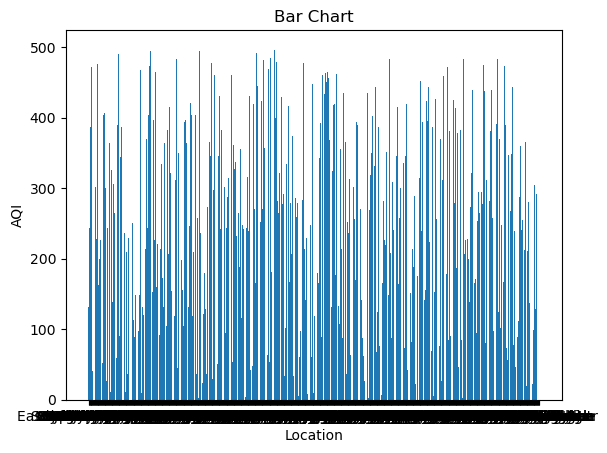

In [5]:
#data visualisation
import matplotlib.pyplot as plt
plt.bar(data['Location'], data['AQI'])
 
plt.title("Bar Chart")
 
plt.xlabel('Location')
plt.ylabel('AQI')
plt

In [6]:
#filling null values
data['Temperature']=data['Temperature'].fillna(data['Temperature'].mean())
data['CO2_Concentration']=data['CO2_Concentration'].fillna(data['CO2_Concentration'].mean())
data['Wind_Speed']=data['Wind_Speed'].fillna(data['Wind_Speed'].mean())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   Wind_Speed         1000 non-null   float64
 4   CO2_Concentration  1000 non-null   float64
 5   PM2.5              1000 non-null   float64
 6   PM10               1000 non-null   float64
 7   Ozone              1000 non-null   float64
 8   NO2                1000 non-null   float64
 9   AQI                1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [8]:
#scale features with MinMaxscale
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data['Temperature']=scaler.fit_transform(data[['Temperature']])
data['Humidity']=scaler.fit_transform(data[['Humidity']])
data['Wind_Speed']=scaler.fit_transform(data[['Wind_Speed']])
data['CO2_Concentration']=scaler.fit_transform(data[['CO2_Concentration']])
data['PM2.5']=scaler.fit_transform(data[['PM2.5']])
data['PM10']=scaler.fit_transform(data[['PM10']])
data['Ozone']=scaler.fit_transform(data[['Ozone']])
data['NO2']=scaler.fit_transform(data[['NO2']])

In [9]:
#split data into train and test tests
x=data[['Temperature','Humidity','Wind_Speed','CO2_Concentration','PM2.5','PM10','Ozone','NO2']]
y=data[['AQI']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
#train linear regression model
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [16]:
#evaluate Random Forest Model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rf_pred=rf_model.predict(x_test)
rf_mse=mean_squared_error(y_test,rf_pred)
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)
print(f'Mean squared error:{rf_mse}')
print(f'Mean absolute error:{rf_mae}')
print(f'R squared :{rf_r2}')

Mean squared error:23416.337499333335
Mean absolute error:132.5352
R squared :-0.023070584894995694


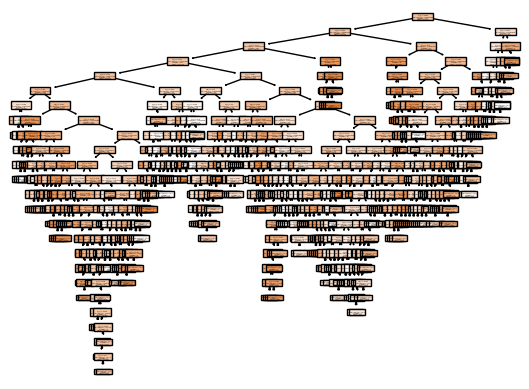

Best model saved as 'best_model.pkl'


In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pickle
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()
# Select the best model
best_model =rf_model 
# Save the best model as a .pkl file
with open('best_model.pkl', 'wb') as file:
 pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")